In [37]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

# Wikipedia tables

In [2]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_oil_spills')

In [3]:
len(tables)

11

In [4]:
tables[0]

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Link(s)
0,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700,2700,Petróleos de Venezuela,[1]
1,2020 Pointe D'Esny MV Wakashio oil spill,"Mauritius, Ile Aux Aigrettes and Mahebourg",25 July 2020,1300,4300,"Wakashio Suisan Company Limited, Kagoshima, Japan",[2] [3]
2,Trans Mountain oil spill,"Canada, British Columbia, Abbotsford",14 June 2020,118.5,184.87,Trans Mountain,[4]
3,Norilsk diesel fuel spill,"Russia, Norilsk, Krasnoyarsk Krai",29 May 2020,17500,17500,Nornickel,[5][6]
4,Tanker truck pumping out sludge from a vessel,"New Zealand, Tauranga, Bay of Plenty",30 March 2020,1.7,1.7,NaN,[7][8]
5,T.G. Williams Well No. 1 tank battery,"United States, Oakland Creek, Longview",30 March 2020,unknown,unknown,Fortune Resources,[9]
6,Greka Energy oil facility,"United States, Santa Maria",30 March 2020,NaN,NaN,Greka,[10]
7,True Oil pipeline,"United States, North Dakota, Red Wing Creek",27 March 2020,unknown,unknown,True Oil LLC,[11]
8,Tanker truck rollover,"United States, Santa Maria, Cuyama River",21 March 2020,14.6,19.5,NaN,[12][13]
9,Keystone Pipeline 2019 spill,"United States, Walsh County, North Dakota",29 October 2019,1240,1240,TransCanada Corporation,[14]


In [5]:
float('unknown')

ValueError: could not convert string to float: 'unknown'

In [6]:
float('nan')

nan

In [9]:
def robust_float(x):
    try: 
        return float(x)
    except ValueError:
        return float('nan')

In [10]:
tonnes = tables[0]['Max Tonnes'].apply(robust_float)

In [11]:
import re

In [21]:
int(re.search('\d{4}', '30 September 2020').group())

2020

What does this do?
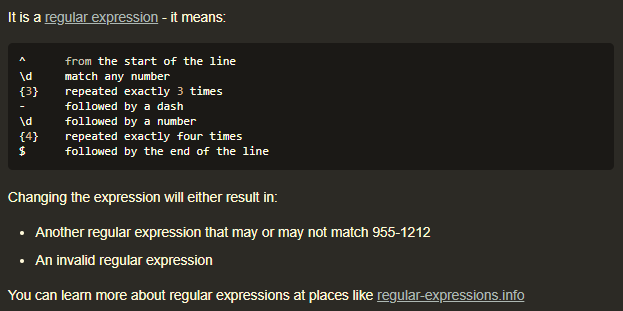
https://stackoverflow.com/questions/11516335/import-example-d3-d4

In [13]:
'\d{4}'

'\\d{4}'

In [34]:
y = tables[0]['Dates'].apply(lambda x: int(re.search('\d{4}', x).group()))  # get the years from the first table

In [29]:
print(y.head())
y.tail()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Dates, dtype: int64


256    1944
257    1937
258    1910
259    1907
260    1903
Name: Dates, dtype: int64

# groupby()

In [32]:
total_tonnes = tonnes.groupby(y).sum()
total_tonnes.tail()

Dates
2016      3108.00
2017      5454.27
2018    138739.00
2019      1355.80
2020     24706.07
Name: Max Tonnes, dtype: float64

In [35]:
total_tonnes_newest = total_tonnes[total_tonnes.index > 1970]

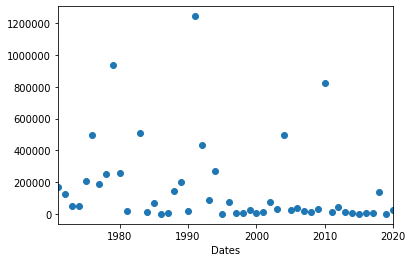

In [38]:
total_tonnes_newest.plot(marker='o', ls='')

In [41]:
spills = y.groupby(y).size()  # count number of spills per group
spills

Dates
1903     1
1907     1
1910     1
1937     1
1940     1
1944     1
1945     1
1946     1
1948     1
1950     2
1953     2
1958     1
1962     1
1967     2
1968     7
1969     2
1970     3
1971     6
1972     2
1973     5
1974     2
1975     6
1976     6
1977     5
1978     5
1979     6
1980     4
1981     1
1983     2
1984     3
        ..
1991     6
1992     4
1993     1
1994     4
1995     2
1996     3
1997     1
1998     1
1999     3
2000     4
2001     8
2002     2
2003     2
2004     7
2005    10
2006     4
2007     7
2008     4
2009     5
2010    14
2011    10
2012     5
2013     8
2014     6
2015     4
2016    10
2017     6
2018     5
2019     6
2020     9
Name: Dates, Length: 66, dtype: int64

In [43]:
spills = spills[spills.index >1970]
spills

Dates
1971     6
1972     2
1973     5
1974     2
1975     6
1976     6
1977     5
1978     5
1979     6
1980     4
1981     1
1983     2
1984     3
1985     3
1986     1
1987     2
1988     2
1989     6
1990     4
1991     6
1992     4
1993     1
1994     4
1995     2
1996     3
1997     1
1998     1
1999     3
2000     4
2001     8
2002     2
2003     2
2004     7
2005    10
2006     4
2007     7
2008     4
2009     5
2010    14
2011    10
2012     5
2013     8
2014     6
2015     4
2016    10
2017     6
2018     5
2019     6
2020     9
Name: Dates, dtype: int64

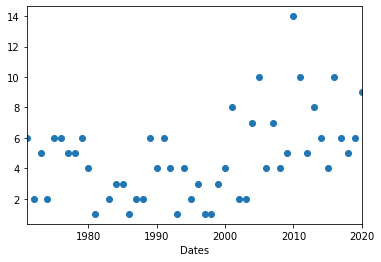

In [44]:
spills.plot(marker='o', ls='')

In [45]:
years = spills.index

# TensorFlow

In [59]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

In [64]:
# I changed the 'l' distribution to logistic from exponential w/ rate=1. Any unknown errors might be bc of this

def spill_count_model(rate_fn):
    count_model = tfd.JointDistributionNamed({
        'e': tfd.Exponential(rate=1.0),
        'l': tfd.Logistic(loc=0, scale=1),
        's': tfd.Uniform(float(years.min()), float(years.max())),
        'd_t': lambda s, l, e: tfd.Independent(
            tfd.Poisson( rate = rate_fn(
                tf.constant(years, dtype=tf.float32),
                s[..., tf.newaxis], l[...,tf.newaxis], e[...,tf.newaxis])
            ),
            reinterpreted_batch_ndims=1)
    })
    return count_model

In [49]:
tf.where([True, True, False], 1, 12)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 1,  1, 12])>

In [51]:
def rate_fn_switch(years, s, l, e):
    return tf.where(years < s, e, l)

In [53]:
def rate_fn_sigmoid(years, s, l, e):
    return e + tf.sigmoid(years - s) * (l - e)

In [54]:
rate_fn_switch(years, 1990, 10, 1)

<tf.Tensor: shape=(49,), dtype=int32, numpy=
array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])>

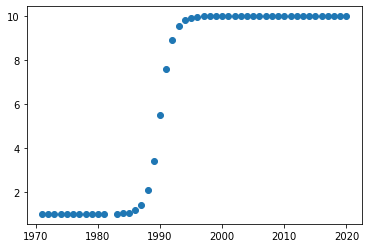

In [55]:
plt.plot(years, rate_fn_sigmoid(years, 1990., 10, 1).numpy(), marker='o', ls='')

In [66]:
model_switch = spill_count_model(rate_fn_switch)
model_sigmoid = spill_count_model(rate_fn_sigmoid)

In [62]:
model_sigmoid.resolve_graph()

(('s', ()), ('l', ()), ('e', ()), ('d_t', ('s', 'l', 'e')))

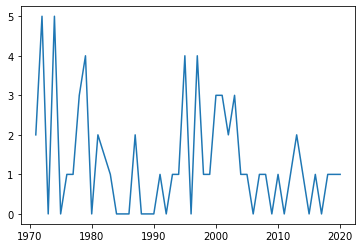

In [67]:
plt.plot(years, model_switch.sample()['d_t'])

In [68]:
def target_log_prob(model, s, e, l):
    return model.log_prob(s=s, e=e, l=l, d_t=spills)

In [69]:
target_log_prob(model_switch, 2000, 4, 8)

<tf.Tensor: shape=(), dtype=float32, numpy=-127.64485>

Hmm, what is this doing?

# MAP estimate

In [70]:
s, e, l = tf.Variable(1990.), tf.Variable(1.), tf.Variable(1.)

In [71]:
loss = lambda: -target_log_prob(model_sigmoid, s, e, l)

In [72]:
loss()

<tf.Tensor: shape=(), dtype=float32, numpy=303.15903>

In [73]:
opt = tf.optimizers.SGD(learning_rate=0.2)
loss_hist = []
var_hist = {v: [] for v in ['s', 'e', 'l']}
for _ in range(50):
    opt.minimize(loss, [s,e,l])
    loss_hist.append(loss().numpy())
    var_hist['e'].append(e.numpy())
    var_hist['s'].append(s.numpy())
    var_hist['l'].append(l.numpy())

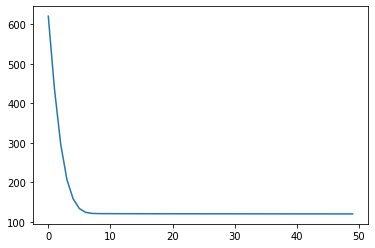

In [74]:
plt.plot(loss_hist)

In [75]:
s,e,l

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2002.4525>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.3553953>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=6.541172>)

# TensorFlow refresher 

In [76]:
thetas = tf.linspace(0., 1., 200)
thetas  # what is theta supposed to be here?

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.040201  , 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055277, 0.11557789, 0.12060301,
       0.12562814, 0.13065326, 0.1356784 , 0.14070351, 0.14572865,
       0.15075377, 0.1557789 , 0.16080402, 0.16582914, 0.17085427,
       0.17587939, 0.18090452, 0.18592964, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120602, 0.24623115,
       0.2512563 , 0.2562814 , 0.26130652, 0.26633164, 0.2713568 ,
       0.2763819 , 0.28140703, 0.28643215, 0.2914573 , 0.2964824 ,
       0.30150753, 0.30653265, 0.3115578 , 0.31658292, 0.32160804,
       0.32663316, 0.33165827, 0.33668342, 0.34170854, 0.34673366,
       0.35175

In [77]:
# simple model with 50 coin tosses
simple_model = tfd.Binomial(total_count=50, probs=thetas)

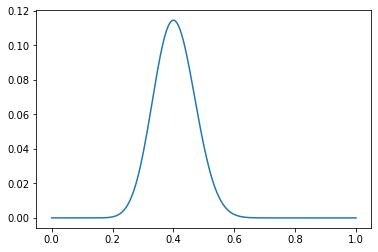

In [79]:
# given that we get 20 times 'heads', what is the likelihood of each theta?
plt.plot(thetas, simple_model.prob(20))

In [80]:
# sample for out thetas, with probability given by the model
idx = tf.random.categorical([simple_model.log_prob(20)], num_samples=10000)[0]

In [81]:
theta_sample = tf.gather(thetas, idx).numpy()

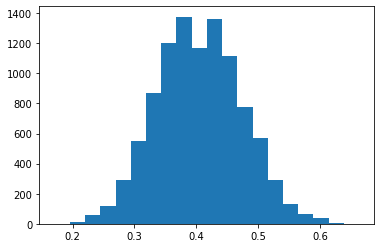

In [82]:
plt.hist(theta_sample, bins=20)
None

In [84]:
# with this sample, we can now answer questions, like how certain are we that the coin is 'unfair'?
print(f'{(theta_sample < 0.5).mean()} of samples is below 0.5')

0.9171 of samples is below 0.5


# Grid approximation

In [85]:
es = tf.linspace(0., 6., 60)
ls = tf.linspace(1., 12., 60)
switches = tf.linspace(1990., 2015., 60)

In [86]:
grid = tf.meshgrid(switches, es, ls)

In [87]:
tf.reshape(grid[0], [-1])

<tf.Tensor: shape=(216000,), dtype=float32, numpy=array([1990., 1990., 1990., ..., 2015., 2015., 2015.], dtype=float32)>

In [89]:
log_probs = target_log_prob(model_sigmoid, *[tf.reshape(grid[i], [-1]) for i in range(3)])

In [90]:
log_probs = tf.reshape(log_probs, [len(switches), len(es), len(ls)])

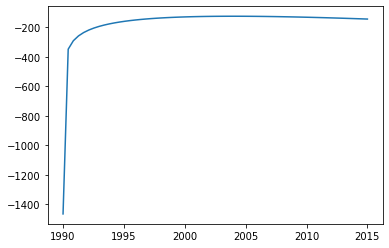

In [91]:
plt.plot(switches, log_probs[:, 20, 20])

In [92]:
es[20], ls[20]

(<tf.Tensor: shape=(), dtype=float32, numpy=2.0338984>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.7288136>)

In [93]:
es[5], ls[35]

(<tf.Tensor: shape=(), dtype=float32, numpy=0.5084746>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.5254235>)

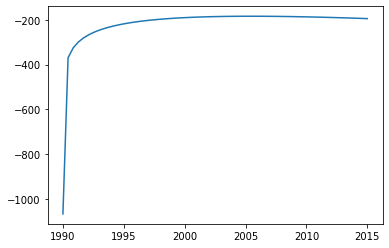

In [94]:
plt.plot(switches, log_probs[:,5,5])

In [96]:
tf.reduce_max(log_probs)

<tf.Tensor: shape=(), dtype=float32, numpy=-120.048775>

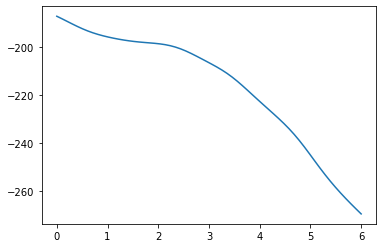

In [97]:
plt.plot(es, log_probs[10,:,10])

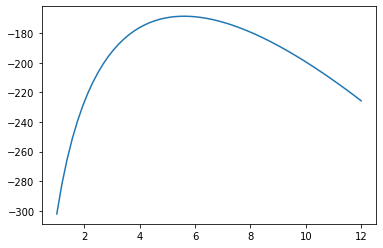

In [98]:
plt.plot(ls, log_probs[10,10,:])

In [99]:
idx = tf.random.categorical(logits=tf.reshape(log_probs, [1,-1]), num_samples=10000)[0]

(array([2.000e+00, 1.000e+00, 6.000e+00, 7.000e+00, 3.700e+01, 2.610e+02,
        1.214e+03, 1.649e+03, 3.344e+03, 2.078e+03, 1.038e+03, 2.370e+02,
        1.060e+02, 1.800e+01, 2.000e+00]),
 array([1990.4237, 1991.8926, 1993.3616, 1994.8304, 1996.2994, 1997.7683,
        1999.2373, 2000.7062, 2002.1752, 2003.644 , 2005.113 , 2006.5819,
        2008.0509, 2009.5198, 2010.9888, 2012.4576], dtype=float32),
 <a list of 15 Patch objects>)

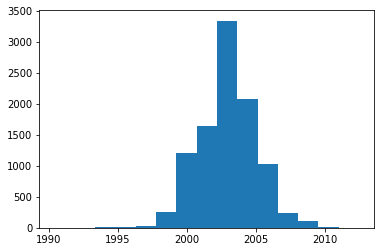

In [100]:
plt.hist(tf.gather(tf.reshape(grid[0], [-1]), idx).numpy(), bins=15)

(array([   7.,   46.,   62.,  460., 1104.,  930., 2222., 2222.,  919.,
        1234.,  519.,  119.,  116.,   36.,    4.]),
 array([2.237288 , 2.4067795, 2.576271 , 2.7457626, 2.915254 , 3.0847456,
        3.2542372, 3.4237287, 3.59322  , 3.7627115, 3.932203 , 4.1016946,
        4.2711864, 4.4406776, 4.6101694, 4.7796607], dtype=float32),
 <a list of 15 Patch objects>)

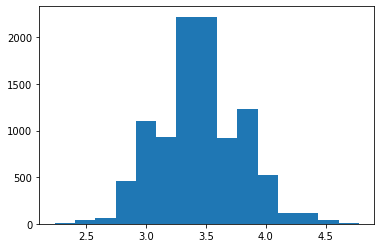

In [101]:
plt.hist(tf.gather(tf.reshape(grid[1], [-1]), idx).numpy(), bins=15)

(array([  37.,  169.,  217.,  918., 1782., 1158., 2192., 1743.,  991.,
         313.,  316.,   71.,   72.,   16.,    5.]),
 array([4.7288136, 5.039548 , 5.3502827, 5.661017 , 5.9717517, 6.282486 ,
        6.59322  , 6.903955 , 7.2146893, 7.525424 , 7.8361583, 8.146893 ,
        8.457627 , 8.768362 , 9.079096 , 9.389831 ], dtype=float32),
 <a list of 15 Patch objects>)

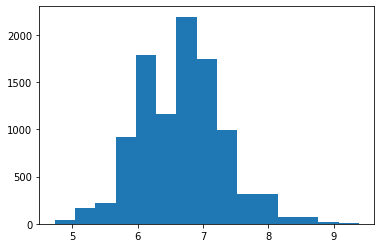

In [102]:
plt.hist(tf.gather(tf.reshape(grid[2], [-1]), idx).numpy(), bins=15)